# Часть 1. Проверка гипотезы в Python и составление аналитической записки

## Проверка гипотезы в Python и составление аналитической записки

- Автор: Бойко Галя
- Дата: 29.05.25

## Цели и задачи проекта

    Цель: Проверить гипотезу о том, что пользователи с большей LTV проводят больше времени в сервисе, слушая книги
    Задачи:
    * Загрузить и ознакомиться с данными
    * Очистить данные
    * Сравнить размеры групп, статистики групп и рапределение.
    * Проверить гипотезу
    * Интерпритировать раезультаты

## Содержимое проекта
1. Загрузка и ознакомление с данными
2. Проверка гипотезы
3. Выводы

## 1. Загрузка данных и знакомство с ними


In [1]:
# Выгрузка библиотек
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind
from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.proportion import proportions_ztest

In [3]:
# Выгрузка 15 первых строк с данными для ознакомления
df.head(15)

,Unnamed: 0,city,puid,hours
0,0,Москва,9668,26.167776
1,1,Москва,16598,82.111217
2,2,Москва,80401,4.656906
3,3,Москва,140205,1.840556
4,4,Москва,248755,151.326434
5,5,Москва,352567,8.206369
6,6,Москва,439493,0.857758
7,7,Москва,494541,0.035072
8,8,Москва,647235,12.000076
9,9,Москва,656480,0.973032


In [4]:
# Проверка на дублитаты
df.duplicated(subset='puid').sum()

244

Дубликаты в индентификаторах пользователей действительно есть. Удалим их

In [5]:
# Удаление дублитатов
df = df.drop_duplicates(subset='puid')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8540 entries, 0 to 8783
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8540 non-null   int64  
 1   city        8540 non-null   object 
 2   puid        8540 non-null   int64  
 3   hours       8540 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 333.6+ KB


In [6]:
# Сравнение размеров групп
df.groupby('city')['puid'].nunique()

city
Москва             6234
Санкт-Петербург    2306
Name: puid, dtype: int64

Группа из Москвы примерно в 2,4 раза больше Питерской 

In [7]:
# Сравнение статистик
df.groupby('city')['hours'].describe()

,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
Москва,6234.0,10.881092,36.851683,0.000018,0.059903,0.924498,5.939972,857.209373
Санкт-Петербург,2306.0,11.264433,39.831755,0.000025,0.060173,0.875355,6.138424,978.764775


Статистики центральной тенденции примерно равные между двумя группами, стандарное отклонение Петербурге больше чем в Москве, максимальное занчение тоже, что  взаимосвязано

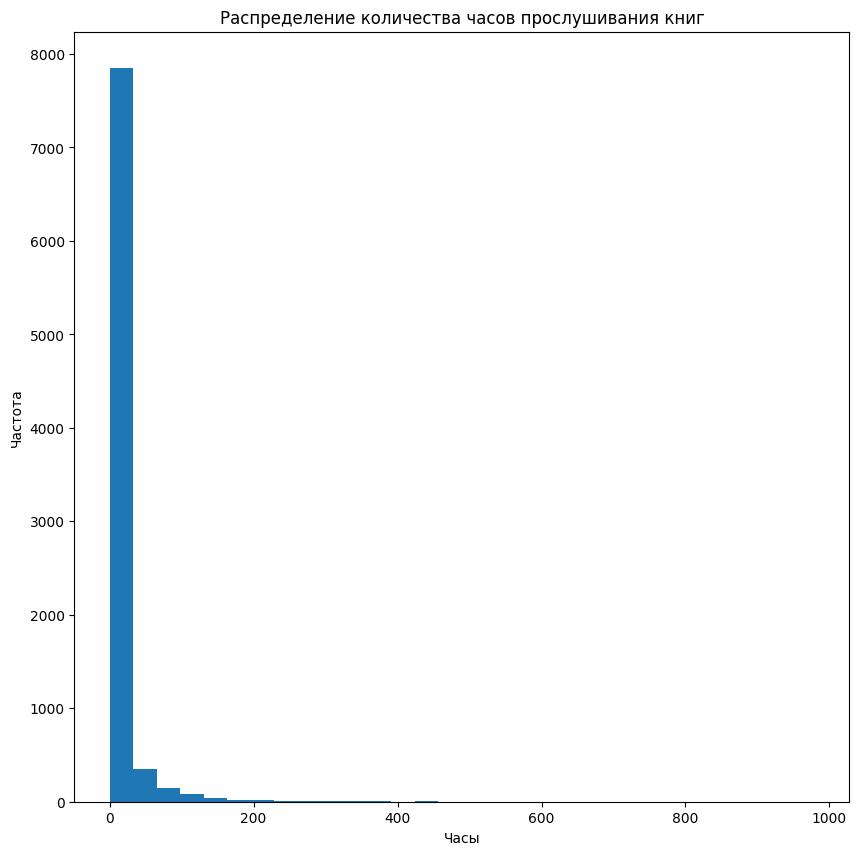

In [8]:
df['hours'].plot(kind='hist', bins=30, figsize=(10, 10))
plt.title('Распределение количества часов прослушивания книг')
plt.ylabel('Частота')
plt.xlabel('Часы')
plt.show()

По общему распределению часов активности видна явная левая асимметрия, большее количество активности сосредоточено до 200 часов 

C:\Users\never\AppData\Local\Temp\ipykernel_33448\2292748280.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=('Москва', 'Санкт-Петербург'))


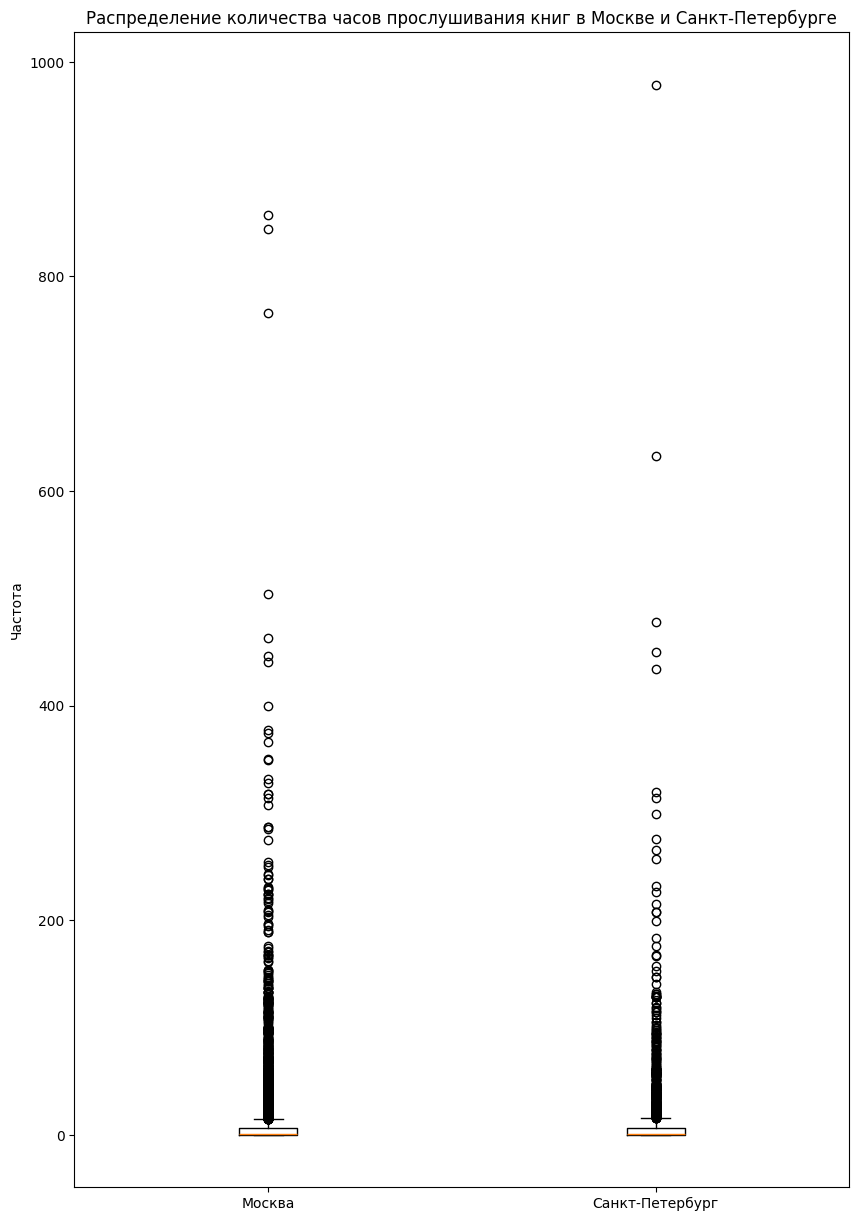

In [9]:
# Выборка количества часов прослушивания для двух групп
A = df[df['city'] == 'Москва']['hours']
B = df[df['city'] == 'Санкт-Петербург']['hours']
data = [A, B]

# Построение визуализации
plt.figure(figsize=(10, 15))
plt.boxplot(data, labels=('Москва', 'Санкт-Петербург'))
plt.title('Распределение количества часов прослушивания книг в Москве и Санкт-Петербурге')
plt.ylabel('Частота')
plt.show()

Как видно на графике в обоих выборках есть выбросы, и распределения не нормальные, однако из-за того что масштабы выбросов примерно одинаковы, поэтому можем провести т-тест

## 2. Проверка гипотезы в Python

- Нулевая гипотеза H₀: Средняя активность пользователей в часах в двух группах (Москва и Санкт-Петербург) не различается.

- Альтернативная гипотеза H₁: Средняя активность пользователей в Санкт-Петербурге больше, и это различие статистически значимо.

Так как выбросы есть в двух группах и они примерно одинаковы можем выбрать t-тест для проверки гипотезы

In [10]:
alpha = 0.05 # Задание уровня значимости

# Статистический тест Стьюдента
stat_ttest, p = ttest_ind(
    B, 
    A,
    alternative='greater')

print(f'p-value = {round(p, 2)}')
if p > alpha:
    print('Нулевая гипотеза находит подтверждение! Выборочные средние в группах A и B не отличаются')
else:
    print('Нулевая гипотеза не находит подтверждения! Выборочные средние в группах A и B отличаются, средняя активность в группе В больше ')

p-value = 0.34
Нулевая гипотеза находит подтверждение! Выборочные средние в группах A и B не отличаются


## 3. Аналитическая записка

- Для проверки гипотезы был выбран одностороонний тест Стьюдента из-за характера гипотезы (гипотеза о среднем) с уровнем значимости 0.05

- По результатам эксперимента p-value равен 0.34

- P-value больше чем альфа следовательно подтверждается нулевая гипотеза: Средняя активность пользователей в Москве и Петербурге не отличается

- Возможно повлиял различный размер групп.



----

# Часть 2. Анализ результатов A/B-тестирования

## 1. Цели исследования


Оценить статистически насколько результативна новая версия сайта

## 2. Загрузка данных и оценка их целостности


In [11]:
# Загрузка данных
participants = pd.read_csv('https://code.s3.yandex.net/datasets/ab_test_participants.csv')
events = pd.read_csv('https://code.s3.yandex.net/datasets/ab_test_events.zip',
                     parse_dates=['event_dt'], low_memory=False)

In [12]:
# Знакомство с данными
participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
 3   device   14525 non-null  object
dtypes: object(4)
memory usage: 454.0+ KB


In [13]:
participants.head()

,user_id,group,ab_test,device
0,0002CE61FF2C4011,B,interface_eu_test,Mac
1,001064FEAAB631A1,B,recommender_system_test,Android
2,001064FEAAB631A1,A,interface_eu_test,Android
3,0010A1C096941592,A,recommender_system_test,Android
4,001E72F50D1C48FA,A,interface_eu_test,Mac


In [14]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787286 entries, 0 to 787285
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     787286 non-null  object        
 1   event_dt    787286 non-null  datetime64[ns]
 2   event_name  787286 non-null  object        
 3   details     249022 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 24.0+ MB


In [15]:
events.head()

,user_id,event_dt,event_name,details
0,GLOBAL,2020-12-01 00:00:00,End of Black Friday Ads Campaign,ZONE_CODE15
1,CCBE9E7E99F94A08,2020-12-01 00:00:11,registration,0.0
2,GLOBAL,2020-12-01 00:00:25,product_page,NaN
3,CCBE9E7E99F94A08,2020-12-01 00:00:33,login,NaN
4,CCBE9E7E99F94A08,2020-12-01 00:00:52,product_page,NaN


In [16]:
# Проверка на дубликаты (использую два сабсета, потому что один и тот же пользователь мог учавствовать в разных тестах)
participants.duplicated(subset=['user_id', 'ab_test']).sum()

0

In [17]:
# Проверка на дубликаты (используя два сабсета, потому что один пользователь совершает множество действия, и сочетания времени операции и id должно быть уникальным)
events.duplicated(subset=['user_id', 'event_dt']).sum()

82882

In [18]:
events = events.drop_duplicates(subset=['user_id', 'event_dt'])
events.info()

<class 'pandas.core.frame.DataFrame'>
Index: 704404 entries, 0 to 787285
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     704404 non-null  object        
 1   event_dt    704404 non-null  datetime64[ns]
 2   event_name  704404 non-null  object        
 3   details     222495 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 26.9+ MB


## 3. Оценка корректности проведения теста по таблице `ab_test_participants`:

### 3.1 Корректость разделения на группы

In [19]:
# Фильтруем только участников нужного теста
participants = participants[participants['ab_test'] == 'interface_eu_test']
participants

,user_id,group,ab_test,device
0,0002CE61FF2C4011,B,interface_eu_test,Mac
2,001064FEAAB631A1,A,interface_eu_test,Android
4,001E72F50D1C48FA,A,interface_eu_test,Mac
5,002412F1EB3F6E38,B,interface_eu_test,Mac
6,002540BE89C930FB,B,interface_eu_test,Android
...,...,...,...,...
14519,FFE600EEC4BA7685,B,interface_eu_test,Android
14520,FFE7FC140521F5F6,A,interface_eu_test,PC
14521,FFEFC0E55C1CCD4F,A,interface_eu_test,PC
14523,FFF28D02B1EACBE1,B,interface_eu_test,PC


In [20]:
# Проверяем процентную разницу между группами
users = participants.groupby('group')['user_id'].count()
pers = round(100 * abs(users.iloc[0] - users.iloc[1]) / users.iloc[0], 2)
print(f'Разница между объемом групп А и В равна {pers}%')

Разница между объемом групп А и В равна 1.56%


In [21]:
# Выборка id пользователей по группам
A = participants[participants['group'] == 'A']['user_id']
B = participants[participants['group'] == 'B']['user_id']

# Проверка пересечения групп
intersection = list(set(A) & set(B))
intersection

[]

Выводы о корректности
- Разница между объемами групп составляет 1,56%, она небольшая, можно пренебречь
- Выборки независимы, пересечния не обнаружены
- АB тест проходит корректно

### 3.2 Анализ данных о пользовательской активности по таблице `ab_test_events`:

In [22]:
# Оставляем только события из нужного теста
events = events[events['user_id'].isin(participants['user_id'])]
events

,user_id,event_dt,event_name,details
64672,5F506CEBEDC05D30,2020-12-06 14:10:01,registration,0.0
64946,51278A006E918D97,2020-12-06 14:37:25,registration,-3.8
66585,A0C1E8EFAD874D8B,2020-12-06 17:20:22,registration,-3.32
67873,275A8D6254ACF530,2020-12-06 19:36:54,registration,-0.48
67930,0B704EB2DC7FCA4B,2020-12-06 19:42:20,registration,0.0
...,...,...,...,...
777488,F80C9BDDEA02E53C,2020-12-30 10:03:51,purchase,4.49
777489,F80C9BDDEA02E53C,2020-12-30 10:03:52,product_cart,NaN
778138,6181F3835EBE66BF,2020-12-30 12:10:39,product_cart,NaN
778369,DD4352CDCF8C3D57,2020-12-30 12:47:46,product_page,NaN


- определите горизонт анализа: рассчитайте время (лайфтайм) совершения события пользователем после регистрации и оставьте только те события, которые были выполнены в течение первых семи дней с момента регистрации;

In [23]:
# Создаем датафрейм с днями регистрации пользователей
reg = events[events['event_name'] == 'registration'][['user_id', 'event_dt']]
reg = reg.rename(columns={'event_dt': 'reg_dt'})
reg

,user_id,reg_dt
64672,5F506CEBEDC05D30,2020-12-06 14:10:01
64946,51278A006E918D97,2020-12-06 14:37:25
66585,A0C1E8EFAD874D8B,2020-12-06 17:20:22
67873,275A8D6254ACF530,2020-12-06 19:36:54
67930,0B704EB2DC7FCA4B,2020-12-06 19:42:20
...,...,...
654461,337CF51CF67A9304,2020-12-23 23:42:48
654517,52B5A81EFC31AF1D,2020-12-23 23:44:45
654518,B1D88FBD4BA58E1B,2020-12-23 23:44:47
654640,16CCB1C8C4DCF1AF,2020-12-23 23:50:29


In [24]:
# Соединяем с таблицей событий
events = events.merge(reg, how='left')

# Подсчитываем количество дней между регистрацией и любым другим событием
events['days_between'] = (events['event_dt'] - events['reg_dt']).dt.days

# Фильтруем события, чтобы остались только 7 первых дней
events = events[events['days_between'] <= 7]
events

,user_id,event_dt,event_name,details,reg_dt,days_between
0,5F506CEBEDC05D30,2020-12-06 14:10:01,registration,0.0,2020-12-06 14:10:01,0.0
1,51278A006E918D97,2020-12-06 14:37:25,registration,-3.8,2020-12-06 14:37:25,0.0
2,A0C1E8EFAD874D8B,2020-12-06 17:20:22,registration,-3.32,2020-12-06 17:20:22,0.0
3,275A8D6254ACF530,2020-12-06 19:36:54,registration,-0.48,2020-12-06 19:36:54,0.0
4,0B704EB2DC7FCA4B,2020-12-06 19:42:20,registration,0.0,2020-12-06 19:42:20,0.0
...,...,...,...,...,...,...
67664,D4E530F6595A05A3,2020-12-29 23:39:54,product_cart,NaN,2020-12-22 06:00:57,7.0
67666,31DBDCA380DD035F,2020-12-29 23:41:16,product_page,NaN,2020-12-23 18:11:40,6.0
67670,E6D34EE376AADC42,2020-12-29 23:45:33,product_cart,NaN,2020-12-22 02:50:40,7.0
67671,E6D34EE376AADC42,2020-12-29 23:46:13,product_cart,NaN,2020-12-22 02:50:40,7.0


Оцените достаточность выборки для получения статистически значимых результатов A/B-теста. Заданные параметры:

- базовый показатель конверсии — 30%,

- мощность теста — 80%,

- достоверность теста — 95%.

In [25]:
# Задаём параметры
alpha = 0.05  # Уровень значимости
beta = 0.2  # Ошибка второго рода, часто 1 - мощность
power = 1 - beta  # Мощность теста
p = 0.3
mde = 0.03  # Минимальный детектируемый эффект

# Инициализируем класс NormalIndPower
power_analysis = NormalIndPower()

# Рассчитываем размер выборки
sample_size = power_analysis.solve_power(
    effect_size = abs(2 *  (np.arcsin(np.sqrt(p)) - np.arcsin(np.sqrt(p + mde)))),
    power = power,
    alpha = alpha,
    ratio = 1 # Равномерное распределение выборок
)

print(f"Необходимый размер выборки для каждой группы: {int(sample_size)}")

Необходимый размер выборки для каждой группы: 3761


In [26]:
# Объединяем таблицу событий с таблицей участников
events = events.merge(participants, how='inner')

In [27]:
# Подсчитываем количество пользователей, которые сделали покупку
events[events['event_name'] == 'purchase'].groupby('group')['user_id'].nunique()

group
A    1081
B    1198
Name: user_id, dtype: int64

In [28]:
# Подсчитываем общее количество пользователей
events.groupby('group')['user_id'].nunique()

group
A    4693
B    4693
Name: user_id, dtype: int64

Размеры каждой группы больше рекомендованных, то есть выборки достаточны для получения статистически значимых результатов

 На данный момент можно сказать, что количество пользователей, совершивших покупки, в контрольной группе меньше, однако и общее количество пользователей там меньше, поэтому нельзя сделать одназанчный вывод

## 4. Оценка результатов A/B-тестирования:

Так как коэффициент конверсии долевая метрика используем Z-тест \
Уровень значимости остается прежним 0.05 \
Сформулируем гипотезу:\
Н0: коэффициент конверсии в тестовой группе меньше или равен коэффициенту из контрольной группы В <= A \
Н1: коэффициент конверсии в тестовой группе больше коэффициента из контрольной группы В > A 

In [29]:
# Проверка достаточности данных
# Размеры выборок A и B
n_a, n_b = events[events.group=='A'].shape[0], events[events.group=='B'].shape[0] 
# Количество успешных сессий в группе A
m_a = events[(events.group=='A')&(events.event_name=='purchase')].shape[0] 
# Количество успешных сессий в группе В
m_b = events[(events.group=='B')&(events.event_name=='purchase')].shape[0] 
# Рассчитываем доли успешных сессий A и B
p_a, p_b = m_a/n_a, m_b/n_b 

if (p_a*n_a > 10)and((1-p_a)*n_a > 10)and(p_b*n_b > 10)and((1-p_b)*n_b > 10):
    print('Предпосылка о достаточном количестве данных выполняется')
else:
    print('Предпосылка о достаточном количестве данных не выполняется')

Предпосылка о достаточном количестве данных выполняется


In [30]:
# Проведение Z-теста
stats_ztest, p = proportions_ztest(
    [m_b, m_a],
    [n_b, n_a],
    alternative='larger'
)

print(f'p-value теста Z-теста = {p}')
if p > alpha:
    print('Нулевая гипотеза находит подтверждение! Изменение в метрике не является статистически значимым')
else:
    print('Нулевая гипотеза не находит подтверждения! Изменение в метрике является статистически значимым')

p-value теста Z-теста = 9.289502938577522e-17
Нулевая гипотеза не находит подтверждения! Изменение в метрике является статистически значимым


Выводы по результатам AB-теста: 
* AB-тест был проведен кореектно: группы примерно равные, пересечений нет, объем групп достаточен для получения статистически значимых результатов
* P-value составило 9.289502938577522e-17, значит по итогам AB-теста внедрение нового интерфейса сайта положительно повлияло на ключевую метрику, а именно коэффициент конверсии